<a href="https://colab.research.google.com/github/efemeryczny/network_analysis/blob/main/WIG_BANKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
wig_banki = ['ALR', 'BHW', 'BNP', 'BOS', 'GTN', 'ING', 'MBK', 'MIL', 'PEO', 
             'PKO', 'SAN', 'SPL', 'UCG']

In [3]:
urls = []
for bank in wig_banki:
  url = f'https://stooq.pl/q/h/?s={bank}'
  urls.append(url)
urls

['https://stooq.pl/q/h/?s=ALR',
 'https://stooq.pl/q/h/?s=BHW',
 'https://stooq.pl/q/h/?s=BNP',
 'https://stooq.pl/q/h/?s=BOS',
 'https://stooq.pl/q/h/?s=GTN',
 'https://stooq.pl/q/h/?s=ING',
 'https://stooq.pl/q/h/?s=MBK',
 'https://stooq.pl/q/h/?s=MIL',
 'https://stooq.pl/q/h/?s=PEO',
 'https://stooq.pl/q/h/?s=PKO',
 'https://stooq.pl/q/h/?s=SAN',
 'https://stooq.pl/q/h/?s=SPL',
 'https://stooq.pl/q/h/?s=UCG']

In [5]:
all_tables = []
for i, url in enumerate(urls):
  tables = pd.read_html(url)
  table = tables[1].copy()
  ticker = wig_banki[i] #wig_banki
  table.loc[:, 'ticker'] = ticker #table['company'] = ticker
  all_tables.append(table)

In [9]:
combined_table = pd.concat(all_tables)
combined_table

,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Wartość rynkowa (PLN),Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,ticker
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
1,NaN,"Ulubione GPW, WIG20, Akcje Indeksy, Azja, Euro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
3,NaN,Market On-line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALR
...,...,...,...,...,...,...,...,...,...,...,...
17,Razem,Razem,14.07%,272929551.0,NaN,23.3 mld,14.07%,272929551.0,NaN,NaN,UCG
18,· Free Float: 88.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCG
19,"· Liczba wszystkich akcji: 1,940,777,908 akcji",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCG
20,· Akcje uprzywilejowane co do głosu: nie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UCG


In [10]:
combined_table.to_csv("wig_banki_table.csv", index=False)

In [11]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
wig_banki_table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wig_dane/wig_banki_table.csv')
wig_banki_table

,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Wartość rynkowa (PLN),Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,ticker
0,1,PZU SA,31.91%,41658850.0,0.0,1.84 mld,31.91%,41658850.0,0.0,4 lis 2022,ALR
1,2,OFE Nationale-Nederlanden,9.34%,12196509.0,-198000.0,540 mln,9.34%,12196509.0,-198000.0,30 gru 2022,ALR
2,3,OFE Allianz Polska,8.83%,11526440.0,9607180.0,510 mln,8.83%,11526440.0,9607180.0,16 maj 2023,ALR
3,4,OFE PKO BP Bankowy,4.76%,6209081.0,70943.0,275 mln,4.76%,6209081.0,70943.0,30 gru 2022,ALR
4,5,OFE NNLife,3.45%,4502562.0,0.0,199 mln,3.45%,4502562.0,0.0,30 gru 2022,ALR
...,...,...,...,...,...,...,...,...,...,...,...
292,8,OFE UNIQA,0.05%,1013978.0,1491.0,86.4 mln,0.05%,1013978.0,1491.0,30 gru 2022,UCG
293,9,OFE PKO BP Bankowy,0.05%,894812.0,0.0,76.3 mln,0.05%,894812.0,0.0,30 gru 2022,UCG
294,10,OFE Allianz Polska,0.04%,738455.0,3838.0,63.0 mln,0.04%,738455.0,3838.0,30 gru 2022,UCG
295,11,OFE Generali,0.03%,603125.0,887.0,51.4 mln,0.03%,603125.0,887.0,30 gru 2022,UCG


In [15]:
all_data = wig_banki_table.rename(columns={'Wartość rynkowa (PLN)': 'Value'})


all_data['Value'] = all_data['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(',', '').str.replace(' ', '')
all_data['Value'] = all_data['Value'].astype(int)

all_data

<ipython-input-15-95f380d8b87a>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_data['Value'] = all_data['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(',', '').str.replace(' ', '')


,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Value,Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,ticker
0,1,PZU SA,31.91%,41658850.0,0.0,184000000000,31.91%,41658850.0,0.0,4 lis 2022,ALR
1,2,OFE Nationale-Nederlanden,9.34%,12196509.0,-198000.0,540000000,9.34%,12196509.0,-198000.0,30 gru 2022,ALR
2,3,OFE Allianz Polska,8.83%,11526440.0,9607180.0,510000000,8.83%,11526440.0,9607180.0,16 maj 2023,ALR
3,4,OFE PKO BP Bankowy,4.76%,6209081.0,70943.0,275000000,4.76%,6209081.0,70943.0,30 gru 2022,ALR
4,5,OFE NNLife,3.45%,4502562.0,0.0,199000000,3.45%,4502562.0,0.0,30 gru 2022,ALR
...,...,...,...,...,...,...,...,...,...,...,...
292,8,OFE UNIQA,0.05%,1013978.0,1491.0,864000000,0.05%,1013978.0,1491.0,30 gru 2022,UCG
293,9,OFE PKO BP Bankowy,0.05%,894812.0,0.0,763000000,0.05%,894812.0,0.0,30 gru 2022,UCG
294,10,OFE Allianz Polska,0.04%,738455.0,3838.0,630000000,0.04%,738455.0,3838.0,30 gru 2022,UCG
295,11,OFE Generali,0.03%,603125.0,887.0,514000000,0.03%,603125.0,887.0,30 gru 2022,UCG


In [19]:
G = nx.from_pandas_edgelist(all_data, 'Akcjonariusz', 'ticker', edge_attr=True)

In [24]:
edgelist = nx.to_edgelist(G)
plt.figure(figsize=(25, 25))
min_value=0.1

<Figure size 2500x2500 with 0 Axes>

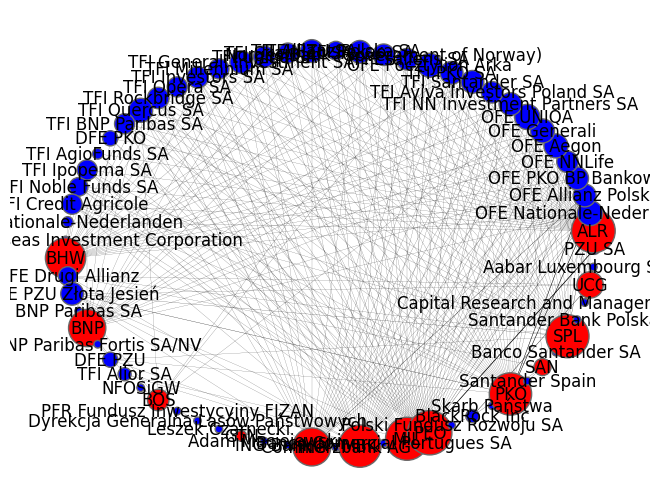

In [25]:
nx.draw_circular(G, with_labels=True, 
                 node_color= ['red' if node in all_data['ticker'].values else 'blue' for node in G],
                 node_size = [v * 30 for v in dict(G.degree()).values()],
                 width=[max(v[2]['Value']/1000000000000, min_value) for v in edgelist],
                 edgecolors='#696969')
plt.show()